In [13]:
import pandas as pd
import numpy as np

# read from file
f = pd.read_csv("gp-training-set" + ".csv", header=None)
size = 5000

# get the label and data, and for data the last column is 1
label = f.values[:,9]
data = np.c_[np.delete (f.values,9,1), np.ones(f.shape[0]) ] 

# initialize weights
weights=np.random.randint(-10,10,size=[5000,10])

#initialize weights_update
weights_update = np.ones([10])

# loop for 100 times
loop = 30
# get the average number that get correct of 5000 weights
ave = np.zeros([loop])
# print (ave.shape)

In [14]:
for it in range (loop):    
    # copy 9%
    for k in range(int(size* 0.09)):
        # generate a random array with size 7
        temp = np.random.randint(0,4999,7)
        # count store how many calculations are correct out of total 49 pieces of data
        count = np.zeros(7)
        

        # fitness function
                
        # weights multiply with training data,
        # >=0, then say the result = 1, and check whether this consists with the label,
        # for seven weights, the right values of them are stored in the count[] array.
        
        for i in  range (temp.shape[0]):
            
            for j in range (f.shape[0]):
        
                if (((data[j].dot(weights[temp[i]]) >= 0) and (label[j] == 1)) 
                    or ((data[j].dot(weights[temp[i]]) < 0) and (label[j] == 0))):
                    count [i] = count [i] + 1
    
        # v to store the id of weights in the temp.
        v = 0
        for i in range(count.shape[0]):
            if (count[i] > count[v]):
                v = i
                
        # update new weights by directly coping the winner
        
        weights_update = np.row_stack((weights_update,weights[temp[v]]))
             
    # crossover 90%
        
    for k in range(int (size* 0.9)):
        parents = np.zeros(2)       
        # 2, one for mother and one for father
        for m in range (2):        
            # tournament selection
            temp = np.random.randint(0,4999,7)
            # count store how many calculations are correct out of total 49 pieces of data
            count = np.zeros(7)
        
            # fitness function
        
            for i in  range (temp.shape[0]):            
                for j in range (f.shape[0]):        
                    if (((data[j].dot(weights[temp[i]]) >= 0) and (label[j] == 1)) 
                        or ((data[j].dot(weights[temp[i]]) < 0) and (label[j] == 0))):
                        count [i] = count [i] + 1        
            # v to store the id of weights in the temp that get most correct.
            v = 0
            for i in range(count.shape[0]):
                if (count[i] > count[v]):
                    v = i            
            parents[m] = temp[v]    
        temp_v = np.random.randint(0,10)
        # print (temp_v)
        temp_m = np.zeros(10)
        # crossover process
        for i in range(temp_v,temp_m.shape[0]):
            temp_m[i] = weights[int (parents[0])][i]
        for i in range(0,temp_v):
            temp_m[i] = weights[int (parents[1])][i]        
        # add new rows to updated weights
        weights_update = np.row_stack((weights_update,temp_m))
        
    # mutation 1%

    for k in range(int (size* 0.01)):
        temp = np.random.randint(0,4999,7)

        count = np.zeros(7)
        
        # fitness function
        # tournament selection
        for i in  range (temp.shape[0]):            
            for j in range (f.shape[0]):        
                if (((data[j].dot(weights[temp[i]]) >= 0) and (label[j] == 1)) 
                    or ((data[j].dot(weights[temp[i]]) < 0) and (label[j] == 0))):
                    count [i] = count [i] + 1
        v = 0
        for i in range(count.shape[0]):
            if (count[i] > count[v]):
                v = i
        
        temp_m = np.zeros(10)
        temp_v = np.random.randint(0,10)
        
        for i in range(0,temp_v):
            temp_m[i] = weights[temp[v]][i]
        # mutation by random number
        for i in range(temp_v, temp_m.shape[0]):
            temp_m[i] = np.random.randint(-10,10)
        
        weights_update = np.row_stack((weights_update,temp_m))        
    # update weights_update    
    weights = weights_update[1:5001]
    weights_update = np.ones([10])
    
    count = np.zeros(weights.shape[0])
    for i in range (weights.shape[0]):
            # print (temp[i])
            for j in range (f.shape[0]):
        #print (data[j].dot(weights[temp[i]]))
                if (((data[j].dot(weights[i]) >= 0) and (label[j] == 1)) 
                    or ((data[j].dot(weights[i]) < 0) and (label[j] == 0))):
                    count [i] = count [i] + 1
    
    ave [it] = np.mean(count)
    # print (ave[it])

28.2094
31.2882
33.8172
35.4674
36.7444
37.7104
38.5204
39.7392
40.817
41.8724
42.9534
44.0378
44.8608
45.1448
45.5466
46.0534
47.215
48.2468
48.59
48.7594
48.762
48.7778
48.7764
48.7714
48.7766
48.7882
48.7662
48.7926
48.7864
48.7852


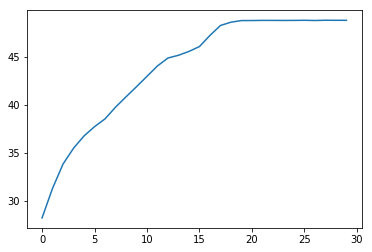

[ 1. -1.  6. -3.  9.  2. -8. -5.  4. -2.]


In [25]:
# plot the average prediction accuracy out of 49 piece of data
# For example, the first value is 28.2094, that means, averagely, each weight in the random generated weights 
# could get 28.2094 out of 49 piece of data correct.
# after over 20 iterations, averagely the 5000 weights could get more than 48 out of 49 piece of data correct.
import matplotlib.pyplot as plt
num = np.arange(30)
plt.plot(num,ave)
plt.show()
print (weights[0])